In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import EoN

import seaborn as sns
from operator import itemgetter
import math
import random
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter


In [59]:
N=20000
ClusterRegion=2
clusterSize=20
clusterNo=2

#G = nx.erdos_renyi_graph(N, p=0.003,seed=None, directed=False)
G=nx.barabasi_albert_graph(N, m=30)
#G = nx.watts_strogatz_graph(N, k = 4, p = 0.4)
#sizes = [10000, 5000, 5000]
#probs = [[0.01, 0.001, 0.00001], [0.001, 0.012, 0.002], [0.00001, 0.002, 0.013]]
#G=nx.stochastic_block_model(sizes, probs, seed=0)
print(G.number_of_nodes())
print(G.number_of_edges())
#nx.average_degree_connectivity(G)
print(2*G.number_of_edges()/G.number_of_nodes())

20000
599100
59.91


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

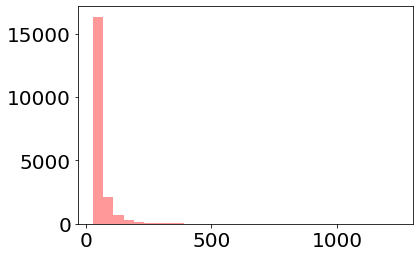

In [60]:

G.degree
sns.distplot(sorted((d for n, d in G.degree()), reverse=True), kde = False, color ='red', bins = 30)

In [61]:
###immunization any network
uv=0.075
node=np.array(list(G.nodes))
uvaccineS=np.zeros(N, dtype=int)
node_group=np.zeros(N, dtype=int)

v=random.sample(range(0, N), int(N*uv))
uvaccineS[v]=1
node_df=pd.DataFrame(node, columns=['node'])
node_df['unvaccine']=uvaccineS
edge_df=nx.to_pandas_edgelist(G, nodelist=list(G.nodes))
unvaccinated_subgraph= edge_df.loc[edge_df['source'].isin(v)&edge_df['target'].isin(v) ]

In [62]:
uvG=nx.Graph()
uvG.add_edges_from(list(zip(unvaccinated_subgraph['source'], unvaccinated_subgraph['target'])))
uN=len(v)
print(uvG.number_of_nodes())
print(uvG.number_of_edges())
#nx.average_degree_connectivity(G)
print(2*uvG.number_of_edges()/uvG.number_of_nodes())

1424
3011
4.228932584269663


In [63]:
centrality = nx.eigenvector_centrality(uvG)
centralityArray=np.array(list(centrality.items()))
sc=sorted(centrality.items(), key=lambda x:x[1],reverse=True)
scList=list(sc)
scArray=np.array(scList)

In [64]:
scArray

array([[1.36000000e+02, 3.43820564e-01],
       [1.03000000e+02, 3.07668910e-01],
       [2.08000000e+02, 1.67232395e-01],
       ...,
       [1.31170000e+04, 8.18835115e-06],
       [1.45500000e+04, 2.47747481e-26],
       [1.75070000e+04, 2.47747481e-26]])

In [65]:
def maximumClusterNodeSelect(scArray):
    #print(scArray[0:math.floor(uN/3),0])
    r=random.sample(scArray[0:math.floor(uN/3),0].tolist(), clusterSize)
    
    cluster=r
    d=0
    ev=0
    for i in cluster:
        d=d+uvG.degree[i]
        ev=ev+centrality[i]
    #print(d/clusterSize)
    #print(cluster)
    return cluster, d/clusterSize, ev/clusterSize
        
def clusterNodeSelect(scArray, c, avgD):
    mi=999999
    cluster_f=[]
    for i in np.arange(1):
        r=random.sample(scArray[math.floor(2*uN/3):uN,0].tolist(), clusterSize)
        
        cluster_f=r
        d=0
        for i in cluster_f:
            d=d+uvG.degree[i]
        av_d_f=d/clusterSize
#         #print(av_d)
#         #print(av_d)
#         min_dif=abs(avgD-av_d)
#         if min_dif<mi:
#             mi=min_dif
#             cluster_f=cluster
#             av_d_f=av_d
#             #print(av_d_f)
            
    #print(d/clusterSize)
    #print(cluster)
    print(av_d_f)
    new_edge_no=math.floor((avgD-av_d_f)*clusterSize)
    node=G.number_of_nodes()
    print(new_edge_no)
    for i in np.arange(new_edge_no):
        
        uvG.add_edge(math.floor(random.choice(list(cluster_f))), node+i)
    d=0
    for i in cluster_f:
            d=d+uvG.degree[i]
    av_d=d/clusterSize
    print(av_d)
    #print(len(cluster_f))
    return cluster_f
            


In [66]:
def connect_node(clusterNodes):
    
    for i in np.arange(len(clusterNodes)-1):
        uvG.add_edge(clusterNodes[i],int(clusterNodes[i+1]) )
        

In [67]:
avgD=10000
ev=0
clusteF=[]
for i in np.arange(1):
    cluster, avgd, evd=maximumClusterNodeSelect(scArray)
    
    if avgd<avgD:
        avgD=avgd
        clusteF=cluster
clusterPd=pd.DataFrame(clusteF, columns=['cluster0'])
#connect_node(clusteF)
print(avgD)
c=[3]

for i in np.arange(clusterNo-1):
    clu='cluster'+str(i+1)
    print(clu)
    
    clusterPd[clu]=clusterNodeSelect(scArray, c[i], avgD)
    #connect_node(clusterPd[clu])
print(clusterPd)

7.6
cluster1
1.85
115
7.6
    cluster0  cluster1
0     7473.0   18405.0
1      206.0   17269.0
2    17541.0   19408.0
3     8928.0    6156.0
4     1612.0   12171.0
5      405.0    2249.0
6    10811.0    3593.0
7     6604.0   10339.0
8    14582.0   19242.0
9    16106.0   19105.0
10    5888.0    2039.0
11    4230.0   17301.0
12    8907.0   11423.0
13      24.0   10354.0
14   19376.0    8239.0
15   13170.0   12857.0
16    1124.0   11885.0
17     839.0   17548.0
18   15833.0    9538.0
19   13238.0   10743.0


In [68]:
newCentrality=nx.eigenvector_centrality(uvG)
newCentralityArray=np.array(list(newCentrality.items()))

In [69]:
tau=0.3
gamma=1
repli=500
episizeA=np.zeros(ClusterRegion)
epicountA=np.zeros(ClusterRegion)
degreeA=np.zeros(ClusterRegion)
eigenvectorA=np.zeros(ClusterRegion)
episize=np.zeros((repli,ClusterRegion), dtype=int)
#aprint(episize)
for c in np.arange(ClusterRegion):
    #episize=0
    epicount=0
    
    for i in np.arange(repli):
        clu='cluster'+str(c)
    
        initial_infecteds=random.choice(clusterPd[clu])
        t, S, I, R=EoN.fast_SIR(uvG, tau, gamma, initial_infecteds)
        episize[i,c]=R[-1]
        if R[-1]>100:
            epicount=epicount+1

    episizeA[c]=np.mean(episize[:,c])
    epicountA[c]=epicount/repli
    print(epicount/repli)
    d=0
    ev=0
    for j in clusterPd[clu]:
            d=d+uvG.degree[j]
            ev=ev+newCentrality[j]
    degreeA[c]=d/clusterSize
    eigenvectorA[c]=ev/clusterSize



0.336
0.072


In [70]:
degreeA

array([7.6, 7.6])

In [71]:
eigenvectorA

array([0.03155473, 0.00182705])

In [72]:
epicountA

array([0.336, 0.072])

In [73]:
epicountA[0]/epicountA[1]

4.666666666666667

In [74]:
eigenvectorA

array([0.03155473, 0.00182705])

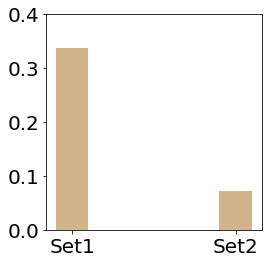

In [77]:

fig = plt.figure(1, (3,3))
ax = fig.add_axes([0,0,1,1])
#c = [ 'saddlebrown', 'thistle', 'lightcoral']
langs = ['Set1', 'Set2']
count = epicountA
plt.bar(langs,(count),color='tan', width=0.2)
#ax.bar_label(count)
#plt.tight_layout()
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
#ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
plt.rcParams["font.size"] = "20"
#ax.set_ylim(0, 15)
#ax.set_ylim(0, 0.07)
ax.set_ylim(0, .4)
fig.savefig("BAepicountA0.3"+str(uv)+".png",dpi=300,bbox_inches='tight')



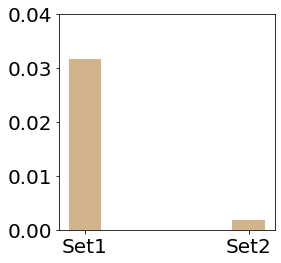

In [78]:

fig = plt.figure(1, (3,3))
ax = fig.add_axes([0,0,1,1])
#c = [ 'saddlebrown', 'thistle', 'lightcoral']
langs = ['Set1', 'Set2']
count = eigenvectorA
plt.bar(langs,(count),color='tan', width=0.2)
#ax.bar_label(count)
#plt.tight_layout()
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
#ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
plt.rcParams["font.size"] = "20"
#ax.set_ylim(0, 15)
ax.set_ylim(0, 0.04)
#ax.set_ylim(0, 0.8)
fig.savefig("BAeigenvectorA"+str(uv)+".png",dpi=300,bbox_inches='tight')

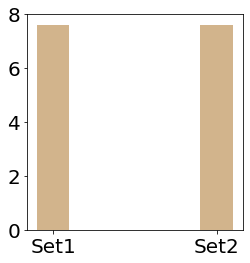

In [79]:

fig = plt.figure(1, (3,3))
ax = fig.add_axes([0,0,1,1])
#c = [ 'saddlebrown', 'thistle', 'lightcoral']
langs = ['Set1', 'Set2']
count = degreeA
plt.bar(langs,(count),color='tan', width=0.2)
#ax.bar_label(count)
#plt.tight_layout()
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
#ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
plt.rcParams["font.size"] = "20"
ax.set_ylim(0, 8)
#ax.set_ylim(0, 0.04)
#ax.set_ylim(0, 0.8)
fig.savefig("BAdegreeA"+str(uv)+".png",dpi=300,bbox_inches='tight')

In [ ]:
fig_box, ax_box = plt.subplots()
ax_box.boxplot(episize)
fig_box.savefig("SBMepidemicsize.png",dpi=300,bbox_inches='tight')

In [ ]:

sum(newCentralityArray[clusterPd['cluster1'].astype('int').to_numpy(),1])


In [ ]:
G.number_of_nodes()

In [359]:
#ERepicountratio unvaccination rate 0.075, 0.1,0.125,0.15
2.84,2.14,1.57,1.38,1.19,1.25,1.2

(2.84, 2.14, 1.57, 1.38, 1.19, 1.25, 1.2)

In [360]:
#BAepicountratio unvaccination rate 0.075, 0.1,0.125,0.15

ratio 3.58,2.41,1.705,1.655,1.42,1.54

0.412 0.55 0.648 0.724 0.744 0.738
0.094 0.218 0.364 0.362 0.488 0.522

SyntaxError: invalid syntax (<ipython-input-360-4a5c465e084a>, line 3)

In [361]:
#BAepicountratio tao 0.1 ,0.3,0.5

0.002 0.41  0.702 0.716 0.832 0.844 0.87 0.892 0.908 0.898 0.922 0.924 0.932
0.0 0.098  0.214  0.354 0.432 0.502 0.528 0.558 0.592 0.62 0.688 0.702 0.718

SyntaxError: invalid syntax (<ipython-input-361-fce0f6d28bfc>, line 3)

<ipython-input-428-39a5a324a872>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_value)


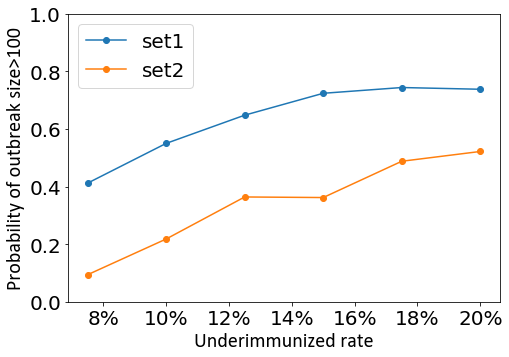

In [428]:
set1=[0.412, 0.55, 0.648, 0.724, 0.744, 0.738]
set2=[0.094, 0.218, 0.364, 0.362, 0.488, 0.522]
uvRate=[7.5, 10, 12.5, 15, 17.5, 20]

fig = plt.figure(1, (6,4))
ax = fig.add_axes([0,0,1,1])
plt.plot(uvRate, set1, color ='tab:blue',marker='o', label='set1') 
plt.plot(uvRate, set2, color ='tab:orange', marker='o',label='set2') 
x_value=['{:,}'.format(int(x)) + '%' for x in ax.get_xticks()]
ax.set_xticklabels(x_value)
ax.set_ylim(0, 1)
plt.xlabel("Underimmunized rate", fontname="Calibri")
plt.ylabel("Probability of outbreak size>100", fontname="Calibri")
plt.legend()
plt.show()
fig.savefig("BASensitivity1"+str(uv)+".png",dpi=300,bbox_inches='tight')

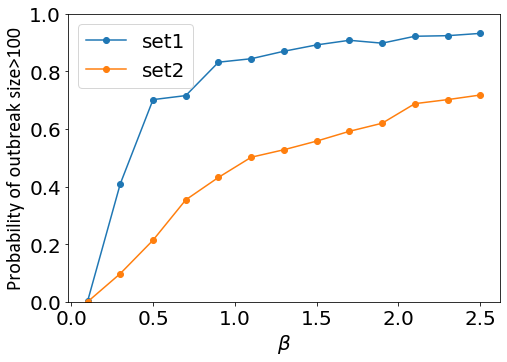

In [429]:
set1=[0.002, 0.41 , 0.702, 0.716, 0.832 ,0.844 ,0.87, 0.892, 0.908, 0.898, 0.922, 0.924, 0.932]
set2=[0.0 ,0.098,  0.214 , 0.354 ,0.432 ,0.502, 0.528, 0.558 ,0.592 ,0.62 ,0.688, 0.702, 0.718]
uvRate=[0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5]

fig = plt.figure(1, (6,4))
ax = fig.add_axes([0,0,1,1])
plt.plot(uvRate, set1, color ='tab:blue',marker='o', label='set1') 
plt.plot(uvRate, set2, color ='tab:orange', marker='o',label='set2') 

ax.set_ylim(0, 1)
plt.xlabel(r'$ \beta $', fontname="Calibri")
plt.ylabel("Probability of outbreak size>100", fontname="Calibri")
plt.legend()
plt.show()
fig.savefig("BASensitivity2"+str(uv)+".png",dpi=300,bbox_inches='tight')